Wahlpflichtfach Künstliche Intelligenz II: Praktikum 

---

# 06 Hands On mit Tensorflow



In [ ]:
%matplotlib inline

## Data Understanding
Laden Sie die Daten und machen Sie sich mit ihnen vertraut. Den Datensatz finden Sie unter folgendem [Link](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset).

In [2]:
import pandas as pd

from sklearn.datasets import load_wine

data = load_wine(as_frame=True)
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df["target"] = data.target
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

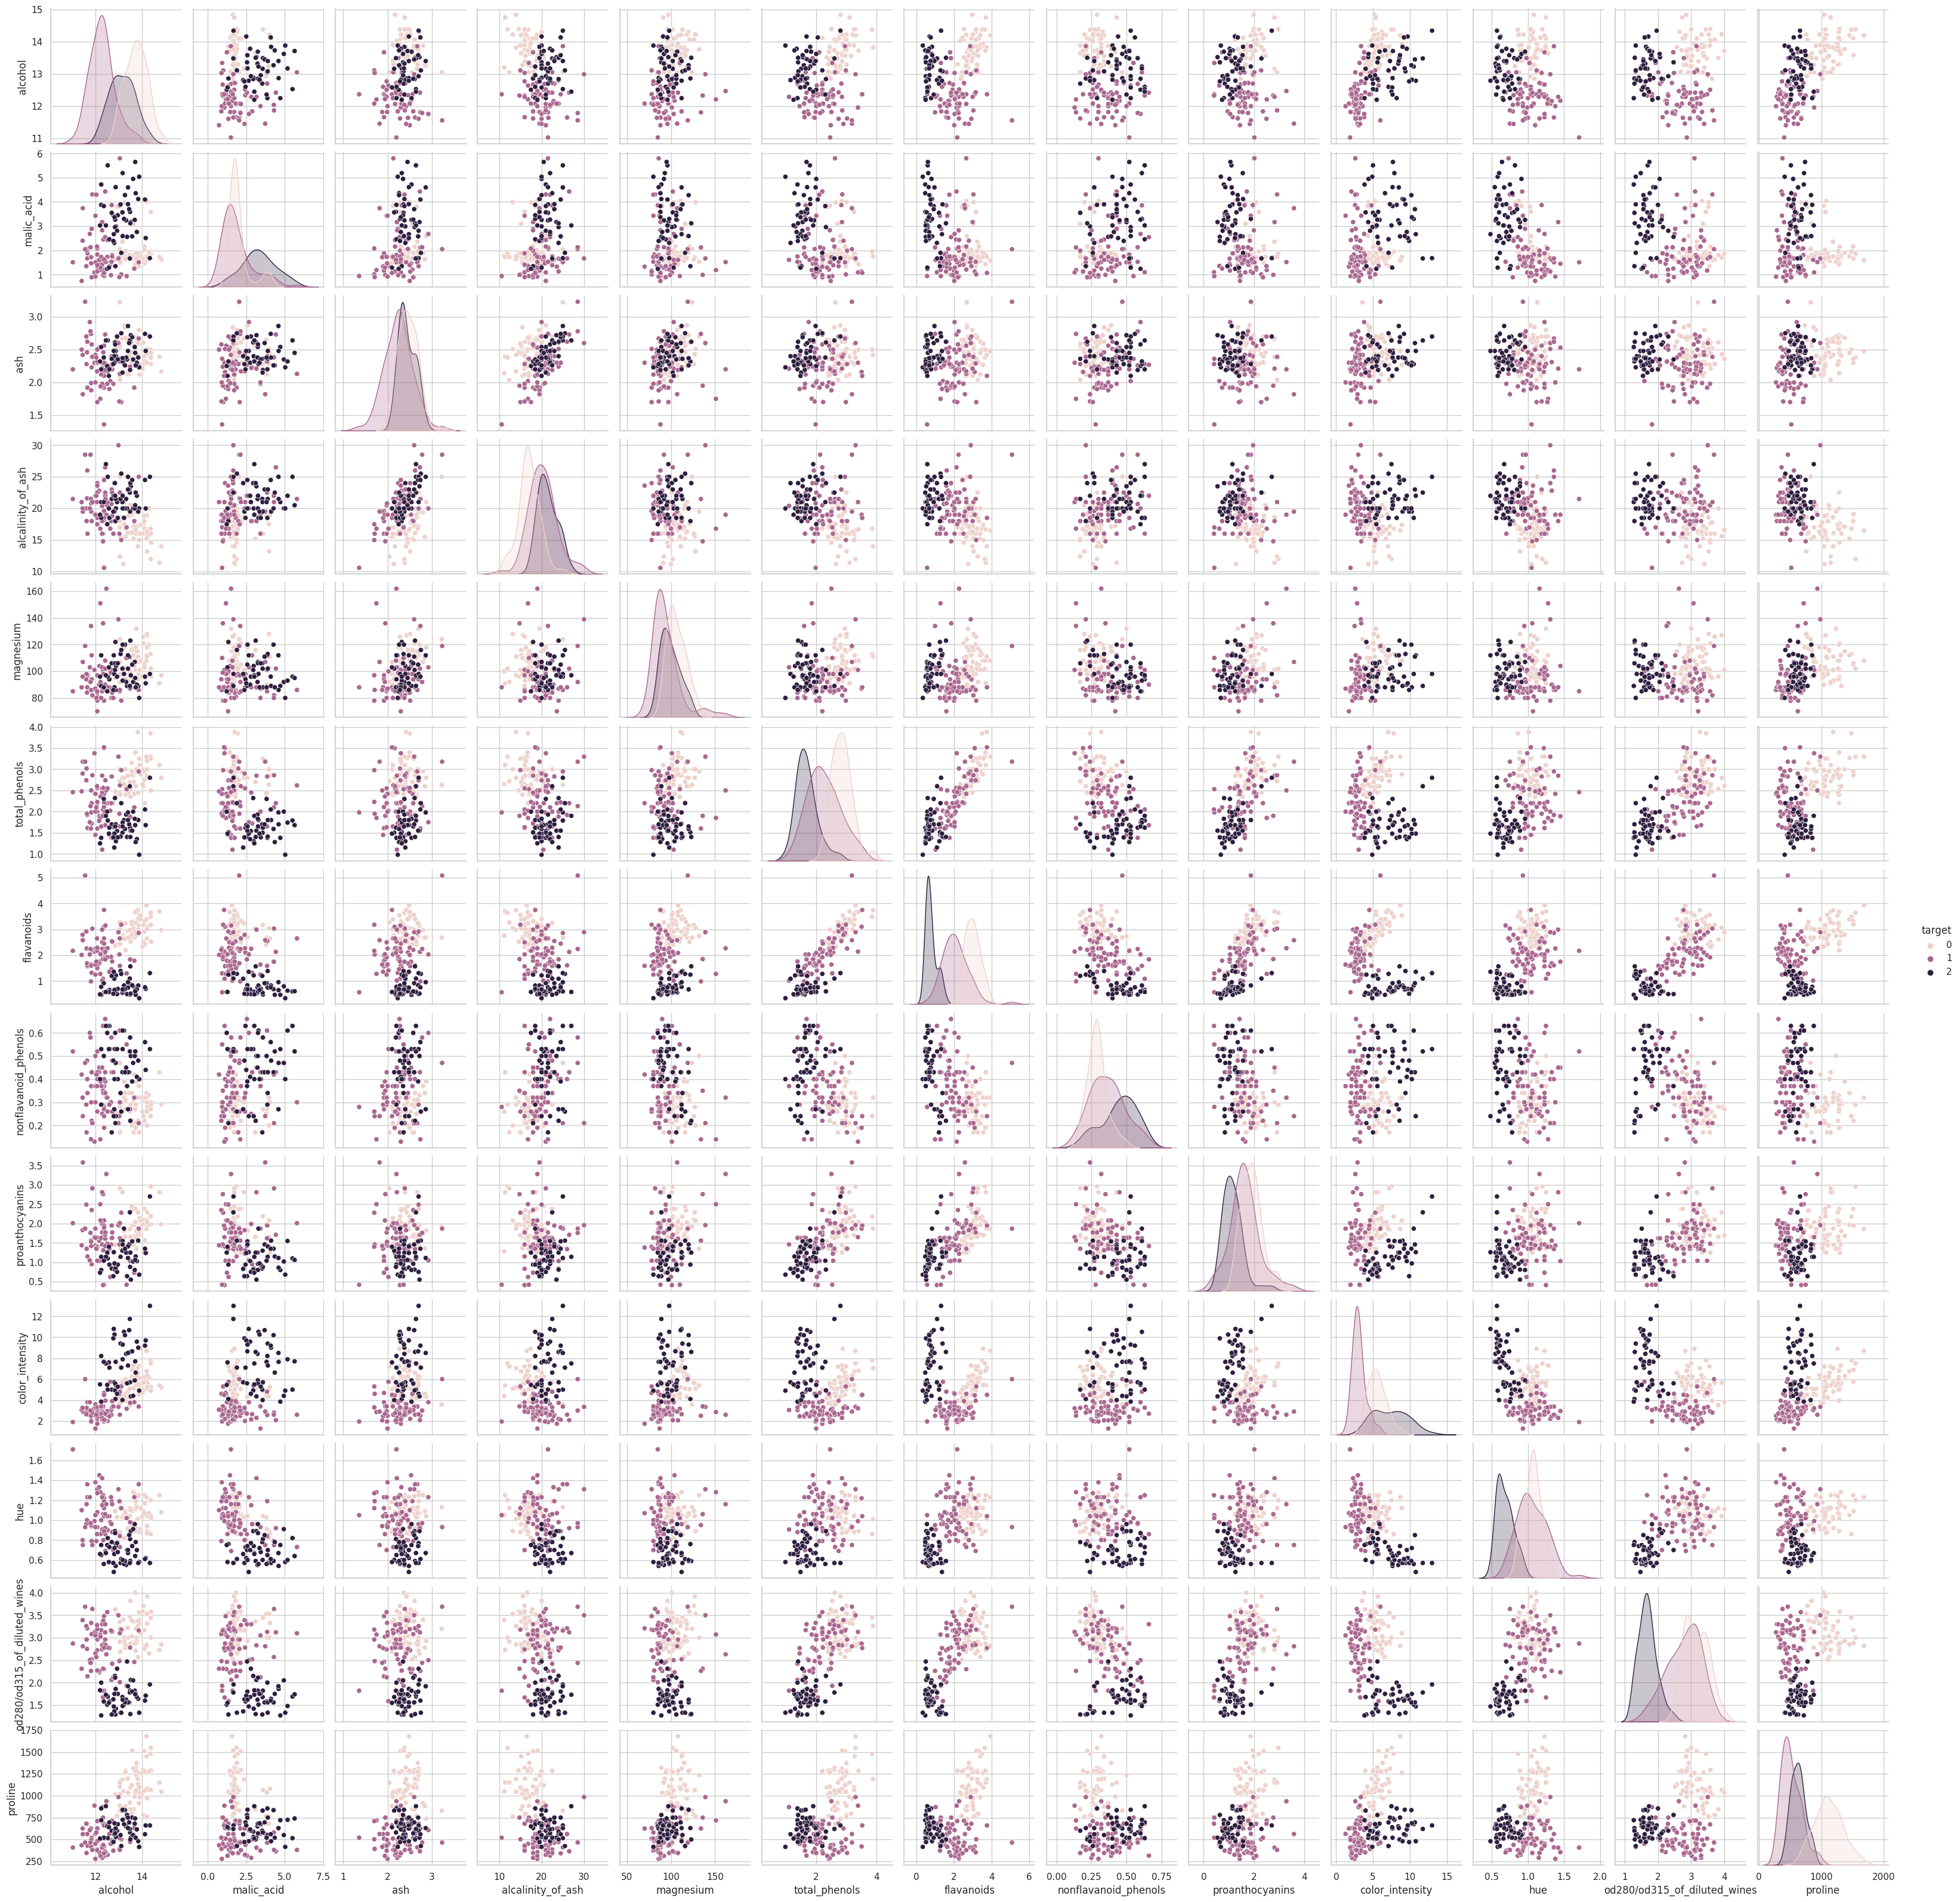

In [3]:
import seaborn as sns


sns.set_theme(style="whitegrid")
sns.pairplot(df, hue="target")

## Data Preperation
Die erste Aufgabe ist es den Datensatz fürs maschinelle Lernen vorzubereiten. Dazu sind die folgenden Schritte nötig:
* a) Auswahl der Strategie(n) zum Ersetzen der fehlenden Werte und anschließenden skalieren dieser
* b) Erstellen der Preparation-Pipeline

_Hinweise/Tipps:_
* Sie müssen die unterschiedlichen Algorithmen nicht (bis zum Maximum) optimieren, hier geht es gerade eher darum zu überprüfen, ob Sie die Algorithmen generell verstanden haben und Sie richtig einsetzen/kombinieren können.
* Gucken Sie sich nochmal die besprochenen Algorithmen aus dem Praktikum 1 an und überlegen wo die Stärken und Schwächen liegen.
* Sie können selbstverständlich auch unterschiedliche Methoden für die einzelnen Merkmale wählen.

**Ihre Antwort:**

### a) Auswahl der Strategie(n)

Als erstes müssen Sie sich eine Strategie zum Ersetzen der fehlenden Werte überlegen. Beschreiben Sie diese in der nachfolgenden Markdown-Zeile und begründen Sie, warum Sie diese Strategie gewählt haben. Außerdem sollten die Daten skaliert/normalisiert werden. Beschreiben Sie Ihre Strategie und begründen Sie, warum Sie diese Strategie bzw. Methoden gewählt haben. Erstellen sie zusätzlich einen Test und Trainingsdatensatz

### b) Erstellen der Preparation-Pipeline

In [63]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x = MinMaxScaler().fit_transform(df.drop("target", axis=1))
y = to_categorical(df["target"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Modeling
Ihre nächste Aufgabe ist es das Training vorzubereiten und den richtigen ML-Algorithmus auszuwählen. Dafür müssen Sie die folgenden Teilaufgaben erledigen:
    a) Erstellen sie ein Multilayer Perceptron
    b) Entscheiden sie sich für eine Loss-Funktion, Optimierer und geeignete Metriken. Zusätzlich erstellen sie ein Tensorboard.
    c) Trainieren sie das neuronale Netz

### a) Erstellen sie ein Multilayer Perceptron
Denken sie an die Initialisierung der Gewichte im Layer sowie die Wahl der Aktivierungsfunktion

In [65]:
from keras import Sequential
from keras.layers import Dense

model = Sequential(name="classification_mlp")
model.add(Dense(16, activation='relu', input_dim=len(data.feature_names)))
model.add(Dense(3, activation='softmax'))

### b) Loss-Funktion, Optimierer und Metriken

In [66]:
from keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.1),
    loss="categorical_crossentropy",
    metrics=[
        "categorical_accuracy",
    ]
)

#### c) Trainieren des neuronale Netz

In [67]:
from datetime import datetime
from keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(
    log_dir=f"../logs/fit/{datetime.now().strftime('%Y%m%d-%H%M%S')}", 
    histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
)

model.fit(
    x=x_train, 
    y=y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=25,
    callbacks=[tensorboard_callback]
)

Epoch 1/10


5/5 [==============================] - 0s 24ms/step - loss: 0.9822 - categorical_accuracy: 0.5575 - val_loss: 0.6872 - val_categorical_accuracy: 0.6897
Epoch 2/10
5/5 [==============================] - 0s 10ms/step - loss: 0.5123 - categorical_accuracy: 0.8142 - val_loss: 0.2630 - val_categorical_accuracy: 0.8966
Epoch 3/10
5/5 [==============================] - 0s 9ms/step - loss: 0.2843 - categorical_accuracy: 0.8761 - val_loss: 0.4018 - val_categorical_accuracy: 0.8621
Epoch 4/10
5/5 [==============================] - 0s 9ms/step - loss: 0.1608 - categorical_accuracy: 0.9381 - val_loss: 0.1342 - val_categorical_accuracy: 0.9310
Epoch 5/10
5/5 [==============================] - 0s 14ms/step - loss: 0.1042 - categorical_accuracy: 0.9735 - val_loss: 0.2331 - val_categorical_accuracy: 0.9310
Epoch 6/10
5/5 [==============================] - 0s 9ms/step - loss: 0.0788 - categorical_accuracy: 0.9735 - val_loss: 0.1528 - val_categorical_accuracy: 0.9655
Epoch 7/10
5/5 [====================

## Evaluation
Verwenden sie die Metriken sowie für das Problem geeignete Visualisierungen und erläutern sie ihre Ergebnisse.

In [68]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0645 - categorical_accuracy: 0.9722


[0.06452679634094238, 0.9722222089767456]

In [69]:
import numpy as np

from sklearn.metrics import classification_report

y_pred = model.predict(x_test)

y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test_classes, y_pred_classes))

2/2 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.94      1.00      0.97        16
           2       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



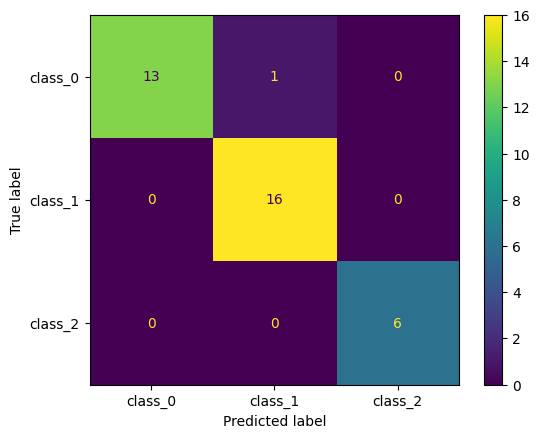

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test_classes, y_pred_classes, display_labels=data.target_names)

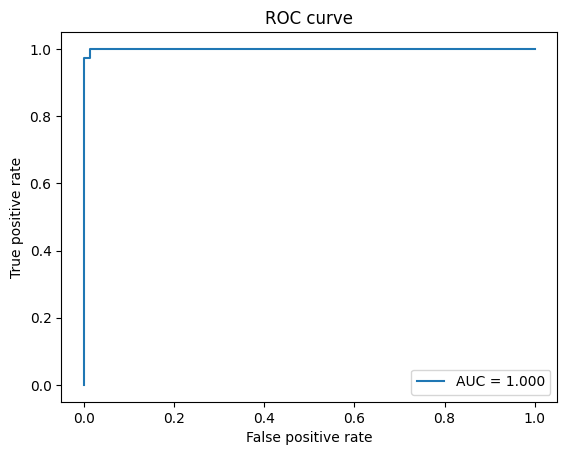

In [72]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test.ravel(), y_pred.ravel())
    
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()

## Hyperparameteroptimierung 

Führen sie eine Hyperparameteroptimierung mit dem Keras-Tuner durch. Anschließend sollen Sie das beste Modell erneut evaluieren und die Veränderung zum vorherigen Begründen.
* a) Hyperparameteroptimierung
* b) Evaluation

### Hyperparameteroptimierung

In [96]:
from datetime import datetime
from pathlib import Path
from keras.callbacks import EarlyStopping
from keras_tuner import HyperParameters, BayesianOptimization
from keras.layers import Input, Dropout


def build_model(hp: HyperParameters):
    model = Sequential()
    model.add(Input(shape=(len(data.feature_names), )))

    for i in range(hp.Int("num_layers", min_value=1, max_value=2, step=1)):
        model.add(Dense(
            hp.Int(f'units_{i}', min_value=8, max_value=32, step=4),
            activation="relu"
        ))

        if hp.Boolean(f"dropout_{i}"):
            model.add(Dropout(rate=hp.Float(f"dropout_rate", min_value=0.1, max_value=0.3,
                                            step=0.1)))

    model.add(Dense(3, activation="softmax"))

    model.compile(
        optimizer=Adam(learning_rate=hp.Float("lr", min_value=1e-2, max_value=1e-1, step=1e-2)),
        loss="categorical_crossentropy",
        metrics=[
            "categorical_accuracy",
        ]
    )

    return model

root_dir = Path.cwd()

tuner = BayesianOptimization(
    hypermodel=build_model,
    objective="val_categorical_accuracy",
    max_trials=10,
    executions_per_trial=2,
    directory=root_dir / ".." / "logs" / f"bayesian_{datetime.now().strftime('%Y.%m.%d-%H:%M:%S')}",
    project_name=f"bayesian_{datetime.now().strftime('%Y.%m.%d-%H:%M:%S')}_categorical_accuracy"
)

tuner.search(
    x_train, 
    y_train, 
    epochs=25, 
    validation_split=0.2,
    callbacks=[EarlyStopping(patience=3)]
)

Trial 10 Complete [00h 00m 02s]
val_categorical_accuracy: 0.9655172228813171

Best val_categorical_accuracy So Far: 0.9655172228813171
Total elapsed time: 00h 00m 21s


### Evaluation
Erläutern sie den unterschied zwischen den beiden Modellen und den Einfluss auf die von Ihnen gemessenen Werte

**Ihre Antwort:**

In [97]:
best_model = tuner.get_best_models()[0]
loss, acc = best_model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.8647 - categorical_accuracy: 0.8889


In [98]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 168       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 475 (1.86 KB)
Trainable params: 475 (1.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [99]:
import numpy as np

from sklearn.metrics import classification_report

y_pred = best_model.predict(x_test)

y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test_classes, y_pred_classes))

2/2 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.83      0.94      0.88        16
           2       0.86      1.00      0.92         6

    accuracy                           0.89        36
   macro avg       0.90      0.91      0.90        36
weighted avg       0.90      0.89      0.89        36



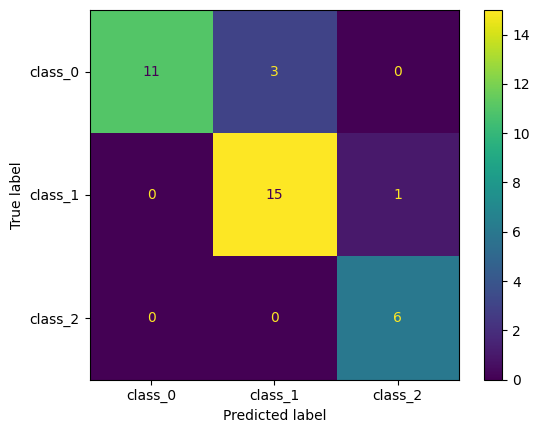

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test_classes, y_pred_classes, display_labels=data.target_names)

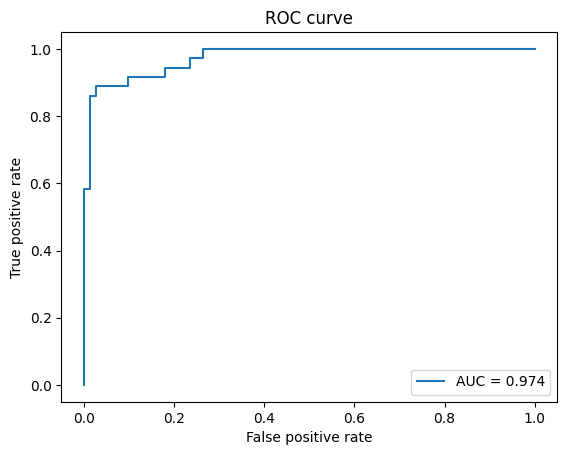

In [101]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test.ravel(), y_pred.ravel())
    
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()

---

Wahlpflichtach Künstliche Intelligenz II: Praktikum 